# Social Media Sentiment Analysis

### Install Required Libraries

In [1]:
pip install pandas numpy matplotlib seaborn nltk


Note: you may need to restart the kernel to use updated packages.


### Generating dataset

In [2]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'PostID': range(1, 101),
    'UserID': np.random.randint(1, 21, 100),
    'PostText': [
        "I love this product!" if np.random.rand() > 0.5 else 
        "This is the worst service ever!" for _ in range(100)
    ],
    'Likes': np.random.randint(0, 1000, 100),
    'Shares': np.random.randint(0, 100, 100),
    'Comments': np.random.randint(0, 50, 100),
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D')
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())


   PostID  UserID                         PostText  Likes  Shares  Comments  \
0       1       7             I love this product!    345      16        39   
1       2      20             I love this product!    623      43        15   
2       3      15             I love this product!    571      91        12   
3       4      11  This is the worst service ever!    880      29        49   
4       5       8  This is the worst service ever!      1      92        41   

        Date  
0 2023-01-01  
1 2023-01-02  
2 2023-01-03  
3 2023-01-04  
4 2023-01-05  


### Data Cleaning

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicate records: {duplicates}')

# If duplicates are found, remove them (not needed in this synthetic dataset)
# df.drop_duplicates(inplace=True)


PostID      0
UserID      0
PostText    0
Likes       0
Shares      0
Comments    0
Date        0
dtype: int64
Duplicate records: 0


### model training

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download NLTK VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(post_text):
    score = sia.polarity_scores(post_text)['compound']
    return 'Positive' if score >= 0.05 else 'Negative' if score <= -0.05 else 'Neutral'

# Apply the sentiment classification
df['Sentiment'] = df['PostText'].apply(classify_sentiment)

# Display the updated DataFrame
print(df[['PostText', 'Sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...


                          PostText Sentiment
0             I love this product!  Positive
1             I love this product!  Positive
2             I love this product!  Positive
3  This is the worst service ever!  Negative
4  This is the worst service ever!  Negative


### Visualization

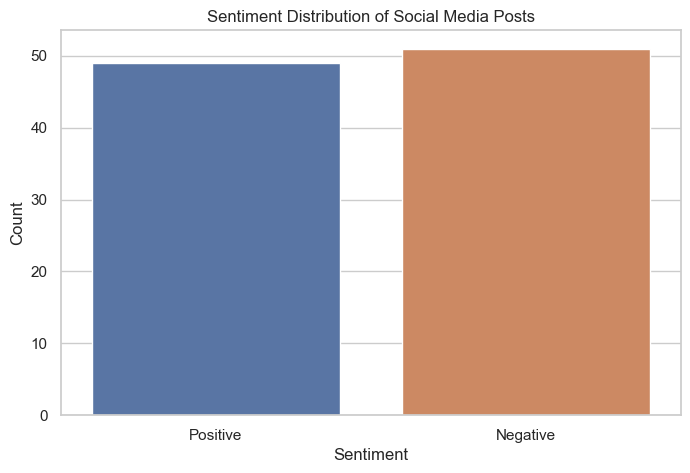

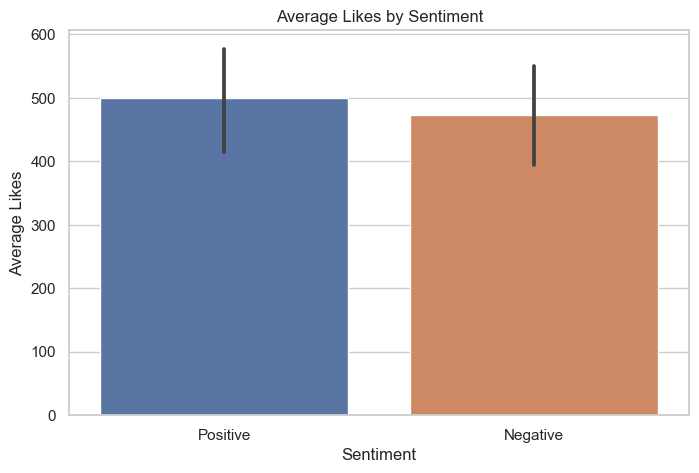

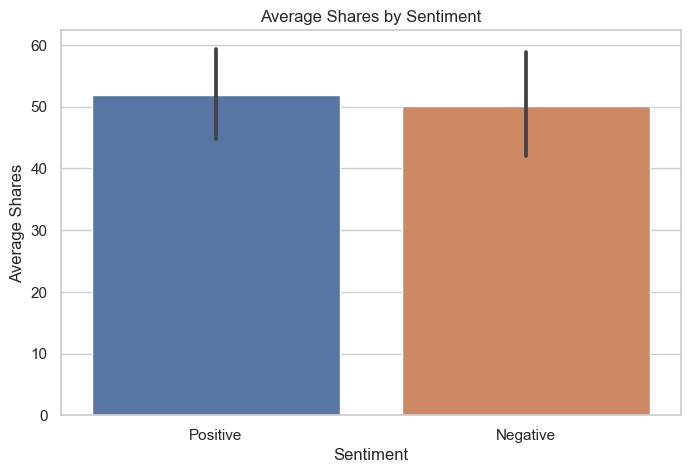

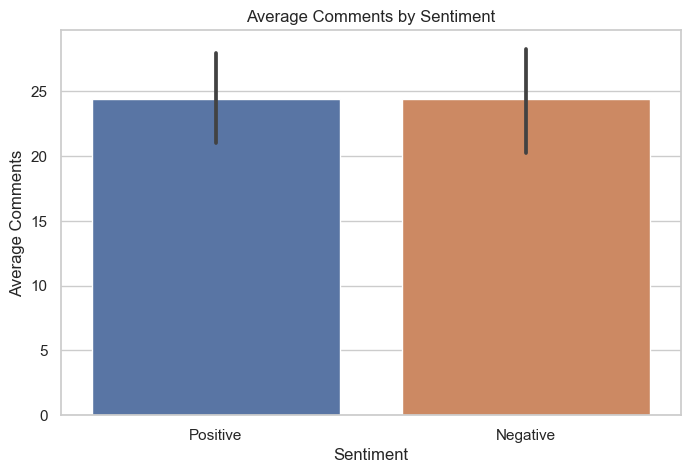

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Countplot of sentiment
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution of Social Media Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Analyze average likes by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Sentiment', y='Likes', estimator=np.mean)
plt.title('Average Likes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Likes')
plt.show()

# Analyze average shares by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Sentiment', y='Shares', estimator=np.mean)
plt.title('Average Shares by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Shares')
plt.show()

# Analyze average comments by sentiment
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Sentiment', y='Comments', estimator=np.mean)
plt.title('Average Comments by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Comments')
plt.show()


### saving output

In [7]:
# Save the cleaned dataset
df.to_csv('social_media_sentiment_data.csv', index=False)


# OUTPUT


In [8]:
# Step 1: Read the CSV file
df = pd.read_csv('social_media_sentiment_data.csv')

# Step 2: Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Step 3: Display summary information
print(f"\nNumber of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)

# Step 4: Display the entire DataFrame (if small)
pd.set_option('display.max_rows', None)  # Remove row limit
pd.set_option('display.max_columns', None)  # Remove column limit
df

First few rows of the dataset:
   PostID  UserID                         PostText  Likes  Shares  Comments  \
0       1       7             I love this product!    345      16        39   
1       2      20             I love this product!    623      43        15   
2       3      15             I love this product!    571      91        12   
3       4      11  This is the worst service ever!    880      29        49   
4       5       8  This is the worst service ever!      1      92        41   

         Date Sentiment  
0  2023-01-01  Positive  
1  2023-01-02  Positive  
2  2023-01-03  Positive  
3  2023-01-04  Negative  
4  2023-01-05  Negative  

Number of rows: 100
Number of columns: 8

Data Types:
PostID        int64
UserID        int64
PostText     object
Likes         int64
Shares        int64
Comments      int64
Date         object
Sentiment    object
dtype: object


,PostID,UserID,PostText,Likes,Shares,Comments,Date,Sentiment
0,1,7,I love this product!,345,16,39,2023-01-01,Positive
1,2,20,I love this product!,623,43,15,2023-01-02,Positive
2,3,15,I love this product!,571,91,12,2023-01-03,Positive
3,4,11,This is the worst service ever!,880,29,49,2023-01-04,Negative
4,5,8,This is the worst service ever!,1,92,41,2023-01-05,Negative
5,6,7,I love this product!,896,45,29,2023-01-06,Positive
6,7,19,I love this product!,303,5,18,2023-01-07,Positive
7,8,11,I love this product!,253,98,16,2023-01-08,Positive
8,9,11,I love this product!,651,36,18,2023-01-09,Positive
9,10,4,This is the worst service ever!,452,23,27,2023-01-10,Negative
